libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Model selection & evaluation
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Pipelines and saving models
from sklearn.pipeline import Pipeline, make_pipeline
import joblib

import os
from sklearn.preprocessing import label_binarize



Loading the data


In [4]:
df =  pd.read_csv('patient_priority.csv')

# Data Exploration

In [5]:
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   float64
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   float64
 4   blood pressure     6962 non-null   float64
 5   cholesterol        6962 non-null   float64
 6   max heart rate     6962 non-null   float64
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   float64
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

In [7]:
df.value_counts()

Unnamed: 0  age   gender  chest pain type  blood pressure  cholesterol  max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  bmi   diabetes_pedigree  hypertension  heart_disease  Residence_type  smoking_status   triage
0           40.0  1.0     2.0              140.0           294.0        172.0           0.0              108.00          43.0            92.0     19.0  0.467386           0.0           0.0            Urban           never smoked     yellow    1
2765        79.0  0.0     0.0              132.0           185.0        189.0           0.0              79.20           71.0            124.0    32.6  0.467386           0.0           0.0            Urban           never smoked     yellow    1
2775        80.0  0.0     0.0              82.0            175.0        155.0           0.0              62.62           26.0            138.0    23.1  0.467386           0.0           0.0            Urban           formerly smoked  yellow    1
2774        50.0  0.0    

Exploring Data

In [8]:
df.describe()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,2011.954180,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,1560.966466,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,0.000000,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,604.000000,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,1628.500000,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,3368.750000,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,5109.000000,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


In [9]:
df.isnull().sum()

Unnamed: 0             0
age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

In [10]:
df = df.dropna()  # removing null data 

In [11]:
# Get unique values for categorical columns (Residence_type, smoking_status, triage)
unique_residence_type = df['Residence_type'].unique()
unique_smoking_status = df['smoking_status'].unique()
unique_triage = df['triage'].unique()

print("Residence Type:", unique_residence_type)
print("Smoking Status:", unique_smoking_status)
print("Triage:", unique_triage)


Residence Type: ['Urban' 'Rural']
Smoking Status: ['never smoked' 'smokes' 'formerly smoked' 'Unknown']
Triage: ['yellow' 'orange' 'red' 'green']


# Splitting the data

In [12]:
X = df.drop('triage', axis=1)
y = df['triage']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv('test_set.csv', index=False)
del X_test, y_test

train_set = pd.concat([X_train, y_train], axis=1)
train_set.to_csv('train_set.csv', index=False)
del X_train, y_train

#Data Visualization

In [13]:
explore_set = pd.read_csv('train_set.csv')

In [14]:
numerical_features = explore_set.select_dtypes(include=['float64','int64']).columns
numerical_features =  numerical_features.drop('Unnamed: 0')

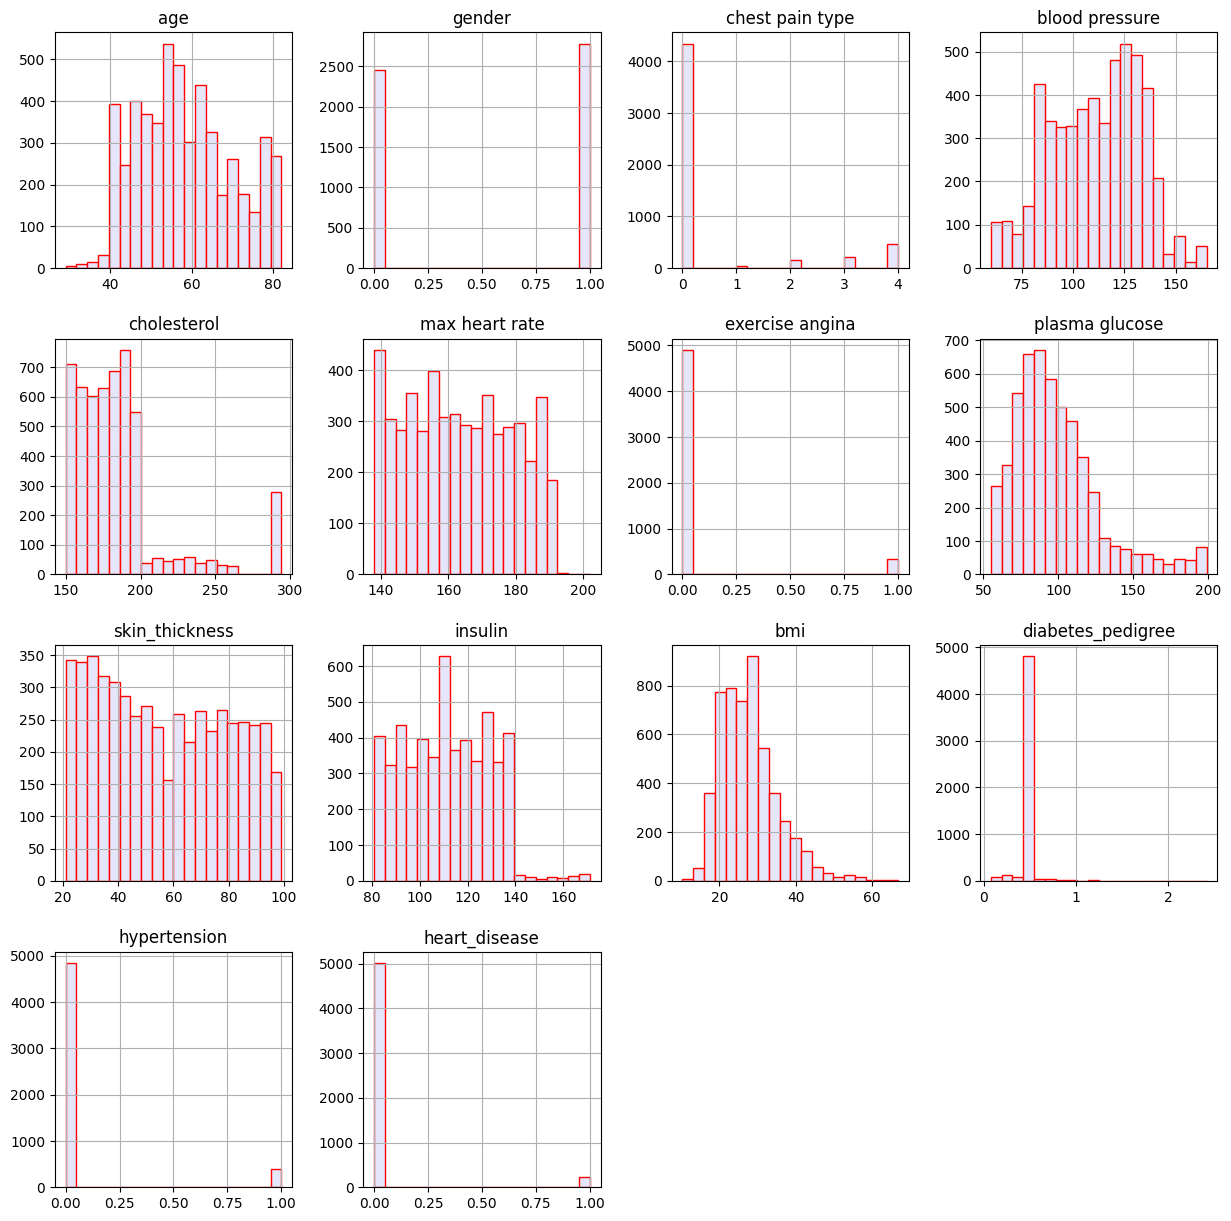

In [15]:
explore_set[numerical_features].hist(bins=20, figsize=(15, 15),color='lavender',edgecolor= 'red')
plt.show()

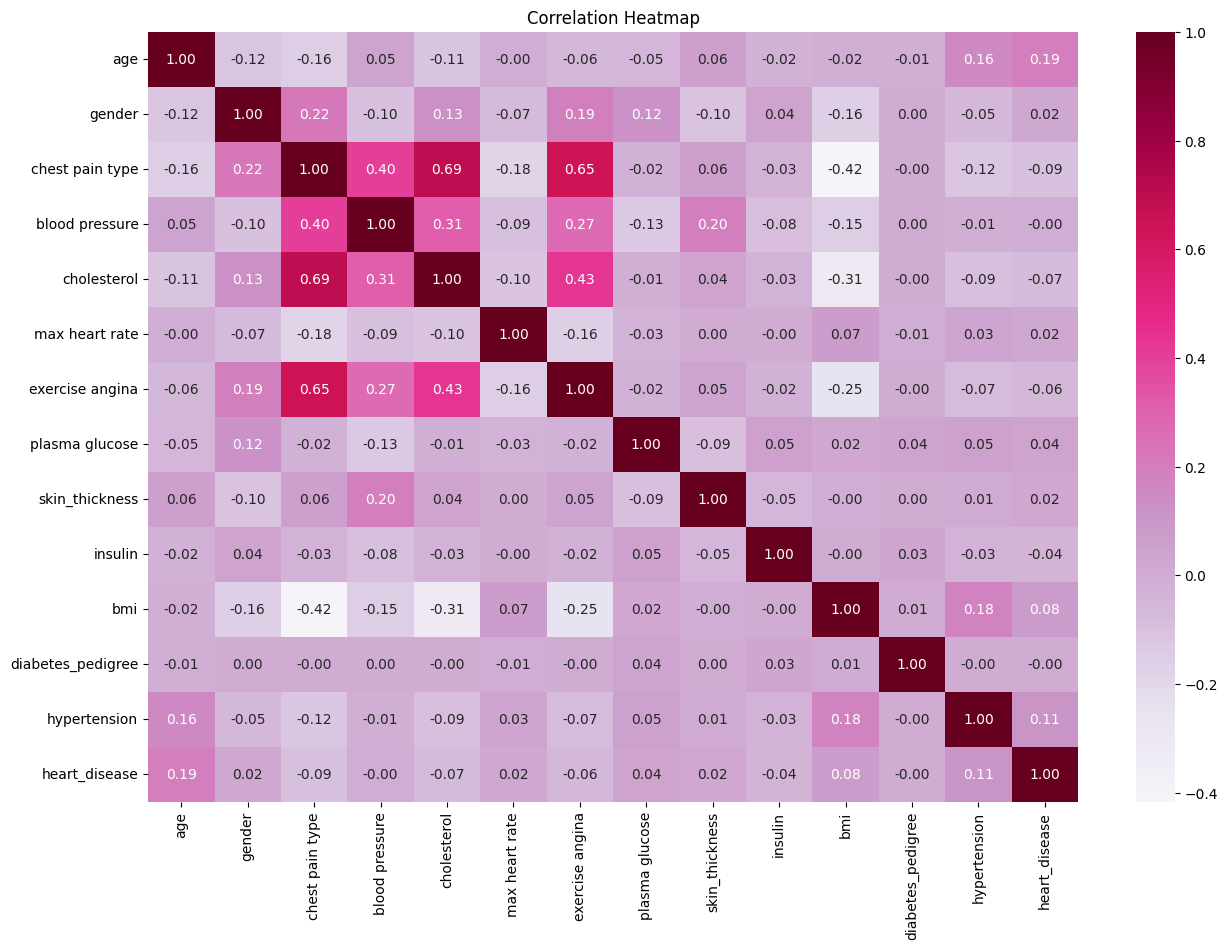

In [16]:
correlation_matrix = explore_set[numerical_features].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


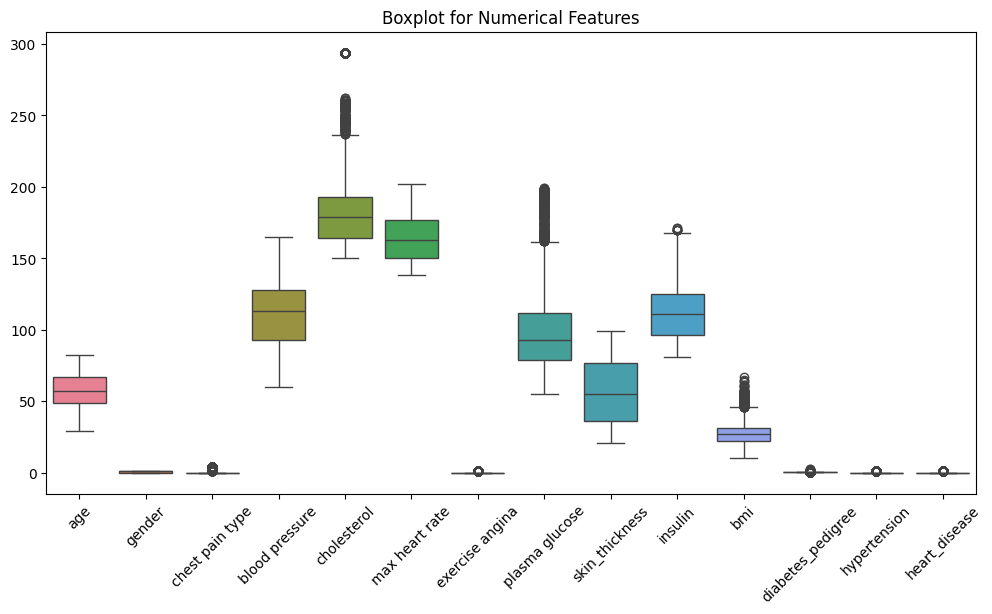

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=explore_set[numerical_features].values)
plt.title("Boxplot for Numerical Features")
plt.xticks(range(len(numerical_features)), numerical_features, rotation=45)
plt.show()

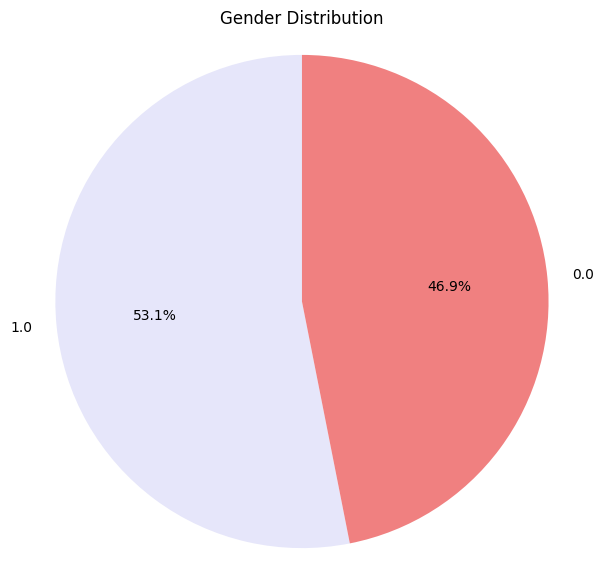

In [18]:
gender_counts = explore_set['gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lavender', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

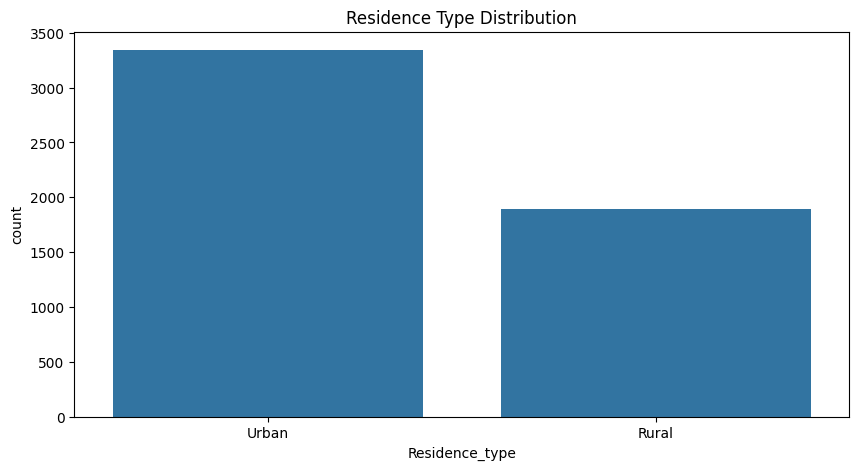

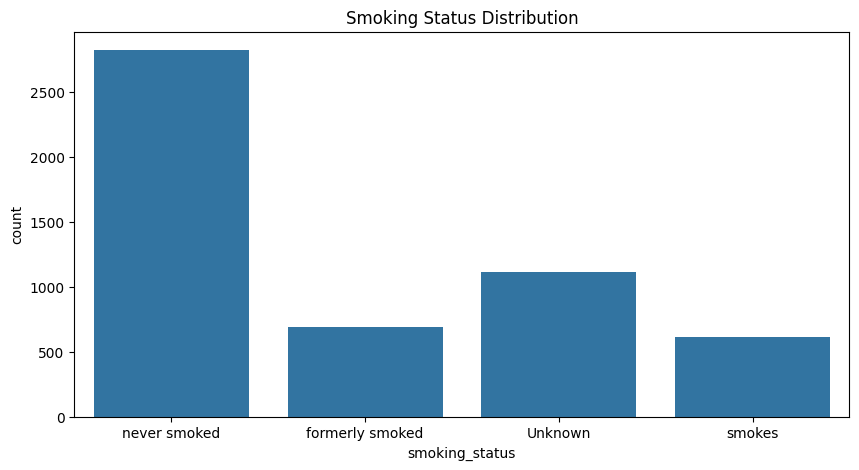

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Residence_type', data=explore_set)
plt.title("Residence Type Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_status', data=explore_set)
plt.title("Smoking Status Distribution")
plt.show()


In [20]:
#triage_palette = {'red': '#FF0000','orange': '#FFA500','yellow': '#FFFF00','green': '#00FF00','blue': '#0000FF'}
#sns.pairplot(df,hue='triage',palette=triage_palette,plot_kws={'s': 40, 'alpha': 0.8, 'edgecolor': 'k'},diag_kind='kde',height=2.5)
#plt.suptitle('Triage Classification Pair Plot', y=1.02)
#plt.show()

In [21]:
triage_cat = train_set[['triage']]
triage_cat.head(7)

,triage
1612,yellow
4589,green
109,yellow
30,yellow
3040,yellow
6385,yellow
758,yellow


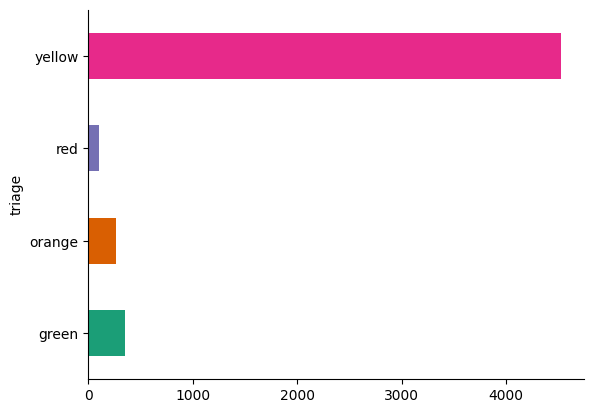

In [22]:
triage_cat.groupby('triage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Engineering

handling missing data

In [23]:
train_data = pd.read_csv('train_set.csv')
train_data.dropna(subset=['triage'], inplace=True)
X = train_data.drop(columns=['triage'])
y = train_data['triage']

y = y.dropna()
X = X.loc[y.index]

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (5240, 17)
Labels shape: (5240,)


In [24]:
train_data.head(10)

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,513,58.0,1.0,0.0,62.0,194.0,181.0,0.0,91.00,31.0,111.0,27.3,0.525000,0.0,0.0,Urban,never smoked,yellow
1,2737,55.0,1.0,0.0,120.0,192.0,146.0,0.0,163.82,64.0,87.0,27.5,0.467386,0.0,0.0,Rural,never smoked,green
2,111,57.0,1.0,4.0,150.0,255.0,168.0,1.0,109.00,96.0,137.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,30,53.0,1.0,3.0,145.0,294.0,145.0,0.0,81.00,21.0,87.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
4,1188,62.0,1.0,0.0,128.0,189.0,188.0,0.0,77.92,40.0,139.0,26.7,0.467386,1.0,0.0,Rural,never smoked,yellow
5,4533,60.0,0.0,0.0,107.0,169.0,174.0,0.0,66.30,88.0,138.0,47.5,0.467386,0.0,0.0,Rural,never smoked,yellow
6,793,51.0,1.0,4.0,140.0,294.0,174.0,1.0,104.00,29.0,115.0,18.0,0.467386,0.0,0.0,Urban,never smoked,yellow
7,616,62.0,1.0,2.0,120.0,254.0,154.0,1.0,107.00,47.0,117.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
8,119,61.0,1.0,0.0,76.0,155.0,149.0,0.0,99.00,23.0,111.0,23.2,0.223000,0.0,0.0,Urban,never smoked,yellow
9,5016,61.0,0.0,0.0,111.0,186.0,178.0,0.0,69.88,96.0,98.0,27.1,0.467386,0.0,0.0,Urban,never smoked,yellow


feature transformation

Skewed Features Detection & Transformation


In [25]:
from scipy.stats import skew

def check_skewness(train_set, features, threshold=0.5):
    results = {}
    for feature in features:
        skewness = skew(train_set[feature].dropna())  # Handle missing values
        results[feature] = "skewed" if abs(skewness) > threshold else "not skewed"
    return results

numerical_features = ['age', 'gender', 'chest pain type', 'blood pressure',
                     'cholesterol', 'max heart rate', 'plasma glucose',
                     'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']

skew_results = check_skewness(train_set, numerical_features)

for feature, result in skew_results.items():
    print(f"{feature}: {result}")

age: not skewed
gender: not skewed
chest pain type: skewed
blood pressure: not skewed
cholesterol: skewed
max heart rate: not skewed
plasma glucose: skewed
skin_thickness: not skewed
insulin: not skewed
bmi: skewed
diabetes_pedigree: skewed


In [26]:
skewed_features = ['chest pain type', 'cholesterol', 'plasma glucose', 'bmi','diabetes_pedigree']
train_set[skewed_features] = np.log1p(df[skewed_features])

Ordinal Encoding for Cat features

In [27]:
triage_order = {'red': 3, 'orange': 2, 'yellow': 1, 'green': 0}
smoking_order = {'smokes': 2, 'formerly smoked': 1, 'never smoked': 0, 'Unknown': -1}

train_data['triage'] = train_data['triage'].map(triage_order)
train_data['smoking_status'] = train_data['smoking_status'].map(smoking_order)

Binning specific features

In [28]:
train_data['age_bin'] = pd.cut(train_data['age'], bins=[0, 30, 50, 70, 100], labels=['young', 'middle', 'senior', 'elderly'])
train_data['chol_bin'] = pd.cut(train_data['cholesterol'], bins=[0, 200, 240, 500], labels=['normal', 'borderline', 'high'])
train_data['bmi_bin'] = pd.cut(train_data['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['underweight', 'normal', 'overweight', 'obese'])
train_data['glucose_bin'] = pd.cut(train_data['plasma glucose'], bins=[0, 70, 100, 126, 200, 600], labels=['Low', 'Normal', 'Prediabetes', 'Diabetes', 'Severe'])
train_data['skin_bin'] = pd.cut(train_data['skin_thickness'], bins=[0, 10, 20, 30, 40, 100], labels=['Very Thin', 'Thin', 'Normal', 'Thick', 'Very Thick'])
train_data['insulin_bin'] = pd.cut(train_data['insulin'], bins=[0, 50, 140, 200, 300, 1000], labels=['Low', 'Normal', 'High', 'Very High', 'Extreme'])

feature creation

In [29]:
train_set['hyper_glucose'] = train_set['hypertension'] * train_set['plasma glucose']

Dropping unimportant features

In [30]:
train_data = train_data.drop(['Unnamed: 0', 'Residence_type'], axis=1)

In [31]:
train_data.columns = train_data.columns.str.strip()

# Model Preparation

In [32]:
# Load dataset
df = pd.read_csv('train_set.csv')
df.columns = df.columns.str.strip()
df = df.drop(['Unnamed: 0', 'Residence_type'], axis=1)
df = df.dropna(subset=['triage'])
# Drop rows where target ('triage') is missing
df = df.dropna(subset=['triage'])

# Separate features and target
X = df.drop('triage', axis=1)
y = df['triage']

# Identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Define preprocessing for numeric and categorical data
numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42),
    'RBF SVM': SVC(kernel='rbf', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier()
}

# Store results
results = {}

# Loop through models
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
    results[name] = {
        'scores': scores,
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    }

# Display summary
for name, result in results.items():
    print(f"{name}:")
    print(f"  Mean Accuracy: {result['mean_accuracy']:.4f}")
    print(f"  Std Dev:       {result['std_accuracy']:.4f}\n")





Decision Tree:
  Mean Accuracy: 0.9994
  Std Dev:       0.0009

Random Forest:
  Mean Accuracy: 0.9996
  Std Dev:       0.0008

Logistic Regression:
  Mean Accuracy: 0.9590
  Std Dev:       0.0105

Linear SVM:
  Mean Accuracy: 0.9452
  Std Dev:       0.0106

RBF SVM:
  Mean Accuracy: 0.9552
  Std Dev:       0.0068

Gradient Boosting:
  Mean Accuracy: 0.9994
  Std Dev:       0.0009

KNN:
  Mean Accuracy: 0.9303
  Std Dev:       0.0073

Gaussian Naive Bayes:
  Mean Accuracy: 0.1950
  Std Dev:       0.0195

Extra Trees:
  Mean Accuracy: 0.9643
  Std Dev:       0.0091

AdaBoost:
  Mean Accuracy: 0.9773
  Std Dev:       0.0107

HistGradientBoosting:
  Mean Accuracy: 0.9989
  Std Dev:       0.0019



In [33]:
# Load dataset
df = pd.read_csv('train_set.csv')
df.columns = df.columns.str.strip()
df = df.drop(['Unnamed: 0', 'Residence_type'], axis=1)
df = df.dropna(subset=['triage'])
X = df.drop('triage', axis=1)
y = df['triage']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Define preprocessing for numeric and categorical data
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Pipelines for classifiers
model_pipelines = {
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),

    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),

    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),

    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]),

    'Linear SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LinearSVC(random_state=42))
    ]),

    'RBF SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))  # Enable probability for ROC curve
    ]),

    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),

    'Gaussian Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ]),

    'Extra Trees': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', ExtraTreesClassifier(random_state=42))
    ]),

    'AdaBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),

    'HistGradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', HistGradientBoostingClassifier(random_state=42))
    ]),
}

print("✅ Model preparation done: Pipelines ready for all classifiers.")


✅ Model preparation done: Pipelines ready for all classifiers.


# Model Training

In [34]:
df = pd.read_csv("train_set.csv")
df.columns = df.columns.str.strip()
df = df.drop(['Unnamed: 0', 'Residence_type'], axis=1)
df = df.dropna(subset=['triage'])

X = df.drop("triage", axis=1)
y = df["triage"]

# Column types
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()

# Preprocessors
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# Models
models = {
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42),
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "linear_svm": LinearSVC(max_iter=10000, random_state=42),
    "rbf_svm": SVC(kernel='rbf', probability=True, random_state=42),
    "gradient_boosting": GradientBoostingClassifier(random_state=42),
    "knn": KNeighborsClassifier(),
    "naive_bayes": GaussianNB(),
    "extra_trees": ExtraTreesClassifier(random_state=42),
    "adaboost": AdaBoostClassifier(random_state=42),
    "hist_gradient_boosting": HistGradientBoostingClassifier(random_state=42),
}

# Output dir
os.makedirs("saved_models", exist_ok=True)

# Train and save
for name, clf in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipeline.fit(X, y)
    joblib.dump(pipeline, f"saved_models/{name}.pkl")
    print(f"✅ Saved: {name}.pkl")

print("🎯 All models trained and saved.")

✅ Saved: decision_tree.pkl
✅ Saved: random_forest.pkl
✅ Saved: logistic_regression.pkl
✅ Saved: linear_svm.pkl
✅ Saved: rbf_svm.pkl
✅ Saved: gradient_boosting.pkl
✅ Saved: knn.pkl
✅ Saved: naive_bayes.pkl
✅ Saved: extra_trees.pkl


c:\Users\youssef desoky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Saved: adaboost.pkl
✅ Saved: hist_gradient_boosting.pkl
🎯 All models trained and saved.


In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Load and prepare the test set
df_test = pd.read_csv('test_set.csv')
df_test = df_test.dropna(subset=['triage'])

X_test = df_test.drop('triage', axis=1)
y_test = df_test['triage']

# Evaluation function
def evaluate_model(model_name, model_path):
    print(f"\n📊 Evaluating {model_name}...")
    try:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

        print(f"✅ Accuracy:  {acc:.4f}")
        print(f"✅ Precision: {prec:.4f}")
        print(f"✅ Recall:    {rec:.4f}")
        print(f"✅ F1-score:  {f1:.4f}")
        print(f"🧮 Confusion Matrix:\n{cm}")
        print(f"📝 Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")

    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

In [36]:
evaluate_model("Decision Tree", "decision_tree.pkl")


📊 Evaluating Decision Tree...
✅ Accuracy:  1.0000
✅ Precision: 1.0000
✅ Recall:    1.0000
✅ F1-score:  1.0000
🧮 Confusion Matrix:
[[  86    0    0    0]
 [   0   82    0    0]
 [   0    0   31    0]
 [   0    0    0 1112]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00        86
      orange       1.00      1.00      1.00        82
         red       1.00      1.00      1.00        31
      yellow       1.00      1.00      1.00      1112

    accuracy                           1.00      1311
   macro avg       1.00      1.00      1.00      1311
weighted avg       1.00      1.00      1.00      1311



In [37]:
evaluate_model("Random Forest", "random_forest.pkl")



📊 Evaluating Random Forest...
✅ Accuracy:  0.9992
✅ Precision: 0.9992
✅ Recall:    0.9992
✅ F1-score:  0.9992
🧮 Confusion Matrix:
[[  86    0    0    0]
 [   0   81    0    1]
 [   0    0   31    0]
 [   0    0    0 1112]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00        86
      orange       1.00      0.99      0.99        82
         red       1.00      1.00      1.00        31
      yellow       1.00      1.00      1.00      1112

    accuracy                           1.00      1311
   macro avg       1.00      1.00      1.00      1311
weighted avg       1.00      1.00      1.00      1311



In [38]:
evaluate_model("Logistic Regression", "logistic_regression.pkl")


📊 Evaluating Logistic Regression...
✅ Accuracy:  0.9428
✅ Precision: 0.9384
✅ Recall:    0.9428
✅ F1-score:  0.9395
🧮 Confusion Matrix:
[[  83    0    0    3]
 [   0   44    3   35]
 [   0    0   20   11]
 [   3   19    1 1089]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.97      0.97      0.97        86
      orange       0.70      0.54      0.61        82
         red       0.83      0.65      0.73        31
      yellow       0.96      0.98      0.97      1112

    accuracy                           0.94      1311
   macro avg       0.86      0.78      0.82      1311
weighted avg       0.94      0.94      0.94      1311



In [39]:
evaluate_model("Gaussian Naive Bayes", "naive_bayes.pkl")


📊 Evaluating Gaussian Naive Bayes...
✅ Accuracy:  0.2037
✅ Precision: 0.8607
✅ Recall:    0.2037
✅ F1-score:  0.2442
🧮 Confusion Matrix:
[[ 54   1  31   0]
 [  0  19  62   1]
 [  0   0  31   0]
 [279 183 487 163]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.16      0.63      0.26        86
      orange       0.09      0.23      0.13        82
         red       0.05      1.00      0.10        31
      yellow       0.99      0.15      0.26      1112

    accuracy                           0.20      1311
   macro avg       0.33      0.50      0.19      1311
weighted avg       0.86      0.20      0.24      1311



In [40]:
evaluate_model("KNN", "knn.pkl")


📊 Evaluating KNN...
✅ Accuracy:  0.9169
✅ Precision: 0.9059
✅ Recall:    0.9169
✅ F1-score:  0.9063
🧮 Confusion Matrix:
[[  72    0    0   14]
 [   0   30    0   52]
 [   0    7    8   16]
 [   3   14    3 1092]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.96      0.84      0.89        86
      orange       0.59      0.37      0.45        82
         red       0.73      0.26      0.38        31
      yellow       0.93      0.98      0.96      1112

    accuracy                           0.92      1311
   macro avg       0.80      0.61      0.67      1311
weighted avg       0.91      0.92      0.91      1311



In [41]:
evaluate_model("Gradient Boosting", "gradient_boosting.pkl")


📊 Evaluating Gradient Boosting...
✅ Accuracy:  1.0000
✅ Precision: 1.0000
✅ Recall:    1.0000
✅ F1-score:  1.0000
🧮 Confusion Matrix:
[[  86    0    0    0]
 [   0   82    0    0]
 [   0    0   31    0]
 [   0    0    0 1112]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00        86
      orange       1.00      1.00      1.00        82
         red       1.00      1.00      1.00        31
      yellow       1.00      1.00      1.00      1112

    accuracy                           1.00      1311
   macro avg       1.00      1.00      1.00      1311
weighted avg       1.00      1.00      1.00      1311



In [42]:
evaluate_model("RBF SVM", "rbf_svm.pkl")


📊 Evaluating RBF SVM...
✅ Accuracy:  0.9405
✅ Precision: 0.9351
✅ Recall:    0.9405
✅ F1-score:  0.9340
🧮 Confusion Matrix:
[[  82    0    0    4]
 [   0   40    1   41]
 [   0    3   13   15]
 [   2   11    1 1098]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.98      0.95      0.96        86
      orange       0.74      0.49      0.59        82
         red       0.87      0.42      0.57        31
      yellow       0.95      0.99      0.97      1112

    accuracy                           0.94      1311
   macro avg       0.88      0.71      0.77      1311
weighted avg       0.94      0.94      0.93      1311



In [43]:
evaluate_model("Linear SVM", "linear_svm.pkl")


📊 Evaluating Linear SVM...
✅ Accuracy:  0.9298
✅ Precision: 0.9201
✅ Recall:    0.9298
✅ F1-score:  0.9189
🧮 Confusion Matrix:
[[  83    0    0    3]
 [   0   27    1   54]
 [   0    2   12   17]
 [   2   12    1 1097]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.98      0.97      0.97        86
      orange       0.66      0.33      0.44        82
         red       0.86      0.39      0.53        31
      yellow       0.94      0.99      0.96      1112

    accuracy                           0.93      1311
   macro avg       0.86      0.67      0.73      1311
weighted avg       0.92      0.93      0.92      1311



In [44]:
evaluate_model("Extra Trees", "extra_trees.pkl")



📊 Evaluating Extra Trees...
✅ Accuracy:  0.9550
✅ Precision: 0.9573
✅ Recall:    0.9550
✅ F1-score:  0.9492
🧮 Confusion Matrix:
[[  80    0    0    6]
 [   0   41    0   41]
 [   0    0   19   12]
 [   0    0    0 1112]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       1.00      0.93      0.96        86
      orange       1.00      0.50      0.67        82
         red       1.00      0.61      0.76        31
      yellow       0.95      1.00      0.97      1112

    accuracy                           0.95      1311
   macro avg       0.99      0.76      0.84      1311
weighted avg       0.96      0.95      0.95      1311



In [45]:
evaluate_model("adaboost", "adaboost.pkl")


📊 Evaluating adaboost...
✅ Accuracy:  0.9687
✅ Precision: 0.9698
✅ Recall:    0.9687
✅ F1-score:  0.9638
🧮 Confusion Matrix:
[[  86    0    0    0]
 [   0   41    0   41]
 [   0    0   31    0]
 [   0    0    0 1112]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00        86
      orange       1.00      0.50      0.67        82
         red       1.00      1.00      1.00        31
      yellow       0.96      1.00      0.98      1112

    accuracy                           0.97      1311
   macro avg       0.99      0.88      0.91      1311
weighted avg       0.97      0.97      0.96      1311



In [46]:
evaluate_model("HistGradientBoosting", "hist_gradient_boosting.pkl")


📊 Evaluating HistGradientBoosting...
✅ Accuracy:  0.9969
✅ Precision: 0.9970
✅ Recall:    0.9969
✅ F1-score:  0.9970
🧮 Confusion Matrix:
[[  85    0    0    1]
 [   0   82    0    0]
 [   0    0   31    0]
 [   3    0    0 1109]]
📝 Classification Report:
              precision    recall  f1-score   support

       green       0.97      0.99      0.98        86
      orange       1.00      1.00      1.00        82
         red       1.00      1.00      1.00        31
      yellow       1.00      1.00      1.00      1112

    accuracy                           1.00      1311
   macro avg       0.99      1.00      0.99      1311
weighted avg       1.00      1.00      1.00      1311



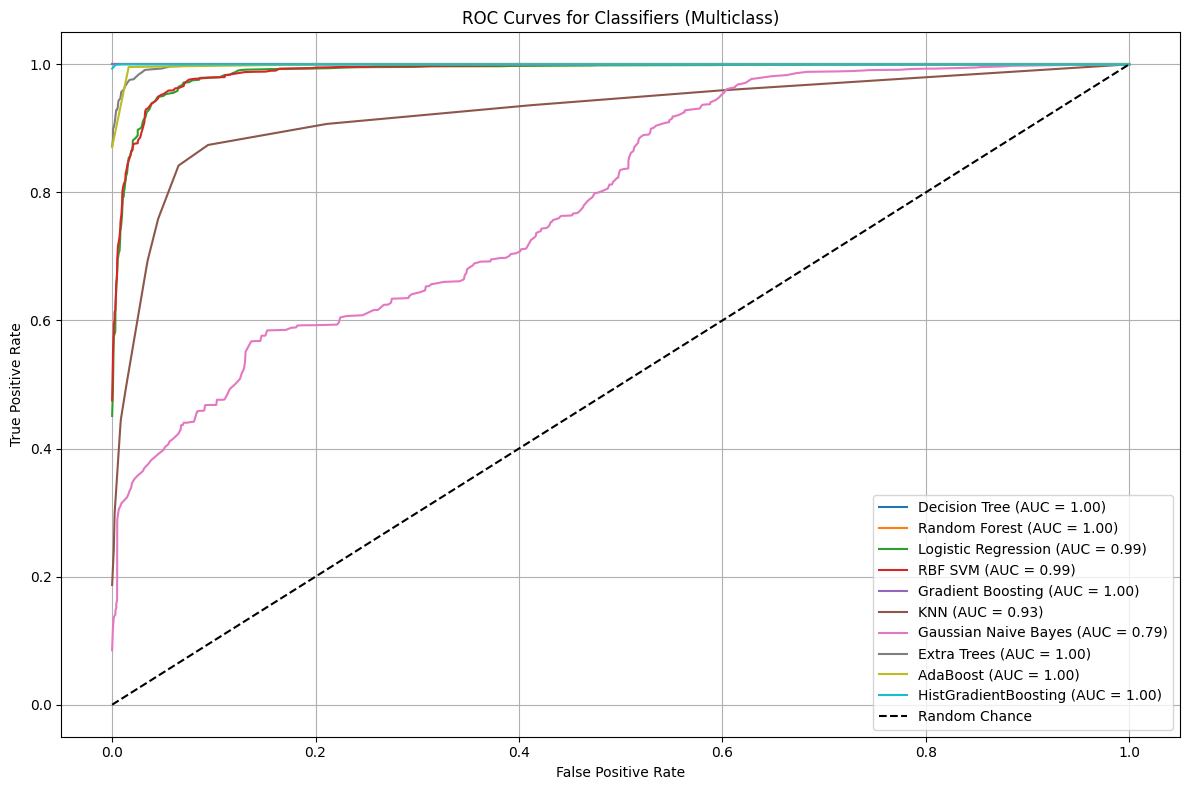

In [47]:
# Load test set
df_test = pd.read_csv('test_set.csv')
df_test = df_test.dropna(subset=['triage'])

X_test = df_test.drop('triage', axis=1)
y_test = df_test['triage']

# Binarize the output for multiclass ROC
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Define models and paths (ensure the paths are correct)
model_paths = {
    'Decision Tree': 'decision_tree.pkl',
    'Random Forest': 'random_forest.pkl',
    'Logistic Regression': 'logistic_regression.pkl',
    'Linear SVM': 'linear_svm.pkl',  # LinearSVC doesn't support predict_proba
    'RBF SVM': 'rbf_svm.pkl',
    'Gradient Boosting': 'gradient_boosting.pkl',
    'KNN': 'knn.pkl',
    'Gaussian Naive Bayes': 'naive_bayes.pkl',
    'Extra Trees': 'extra_trees.pkl',
    'AdaBoost': 'adaboost.pkl',
    'HistGradientBoosting': 'hist_gradient_boosting.pkl',
}


# Plot ROC curve
plt.figure(figsize=(12, 8))

for name, path in model_paths.items():
    try:
        model = joblib.load(path)
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)

            # Compute ROC and AUC for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()

            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            # Average macro AUC
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= n_classes
            mean_auc = auc(all_fpr, mean_tpr)

            plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")
    except Exception as e:
        print(f"⚠ Skipped {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

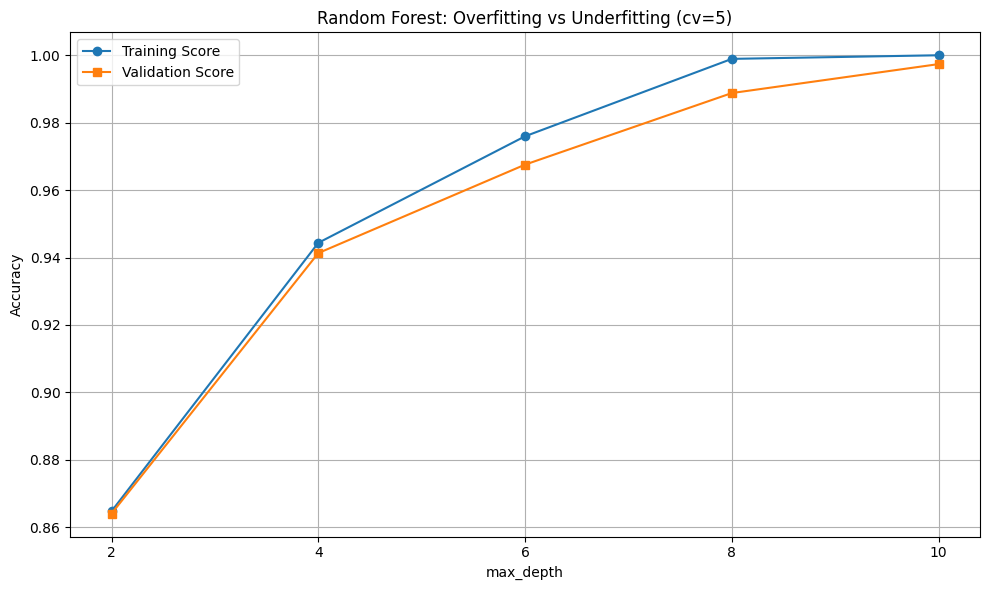

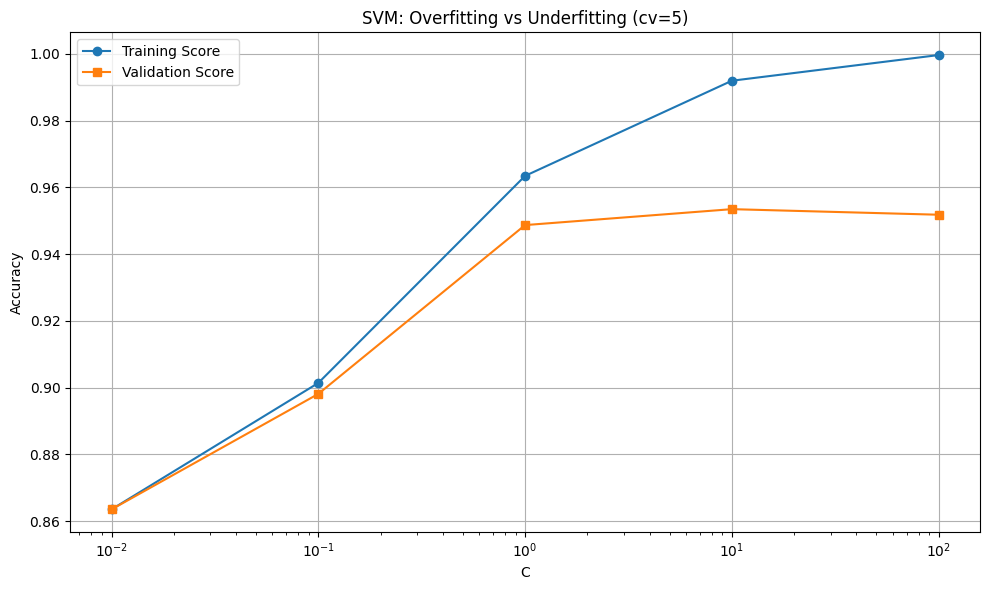

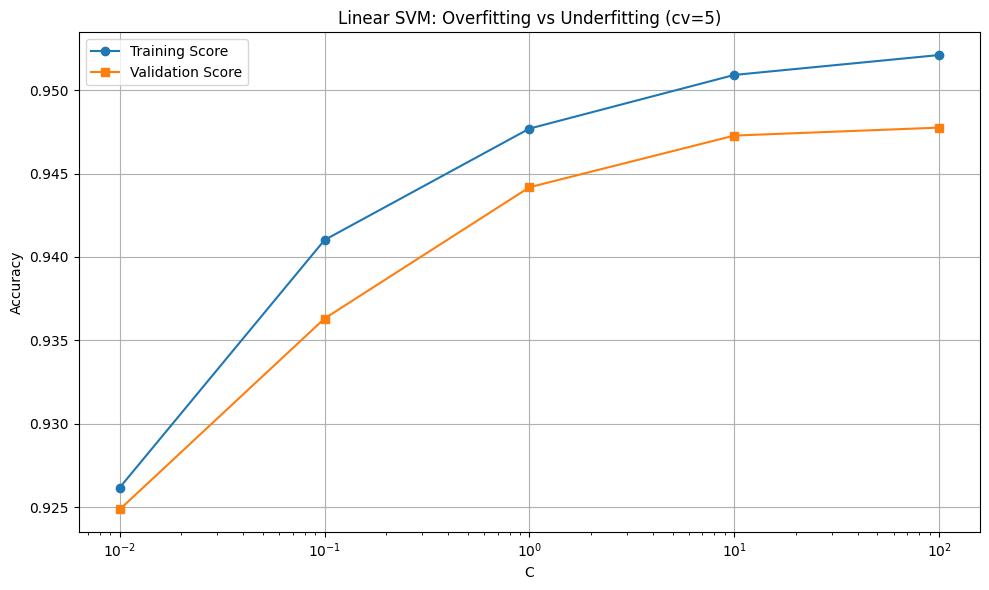

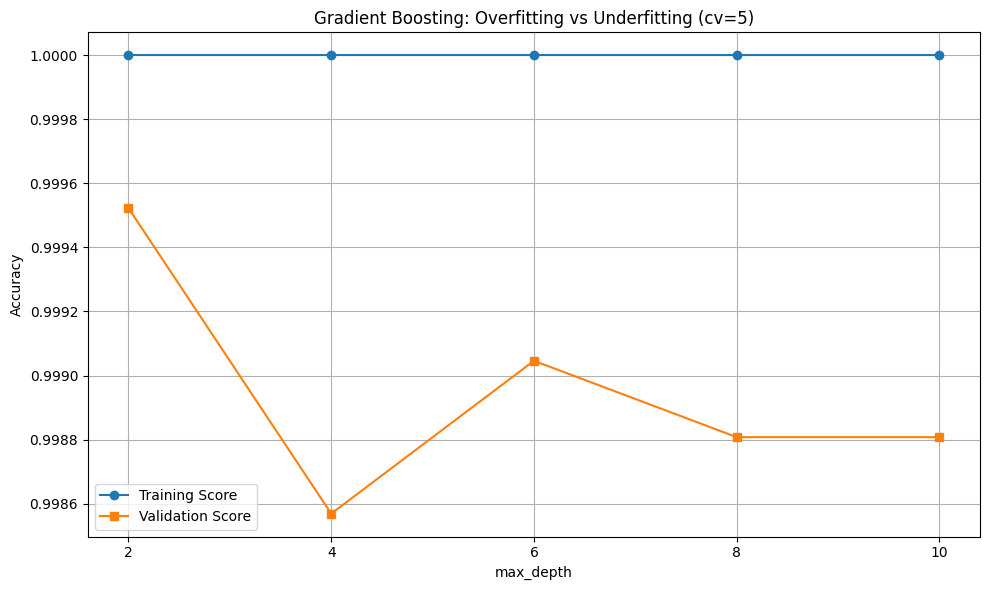

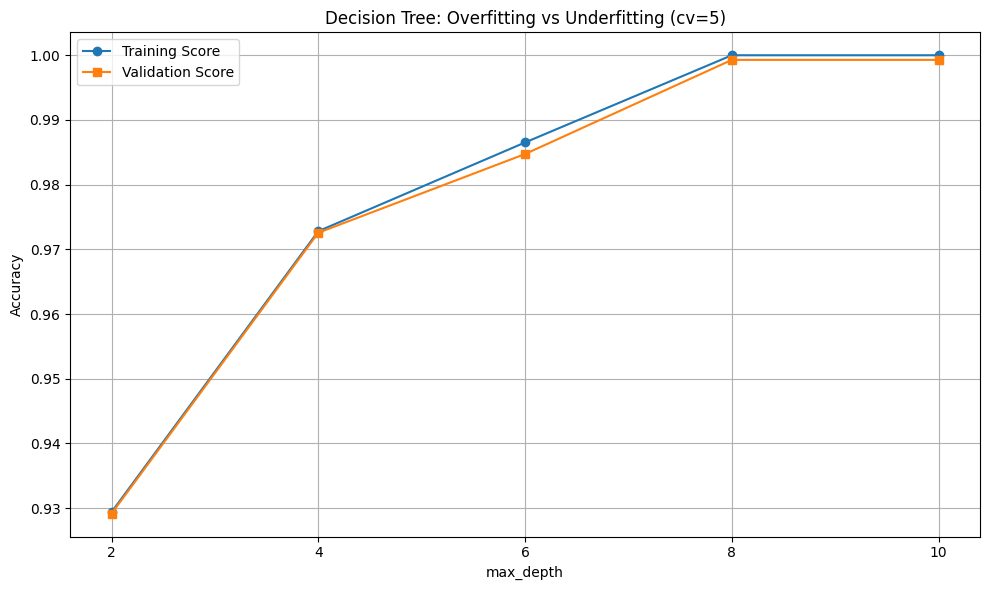

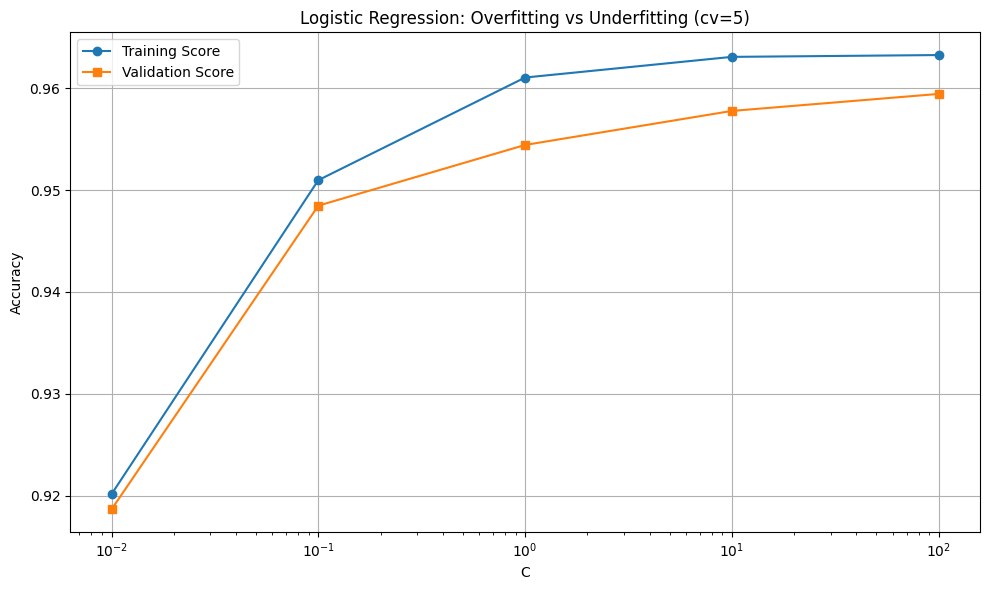

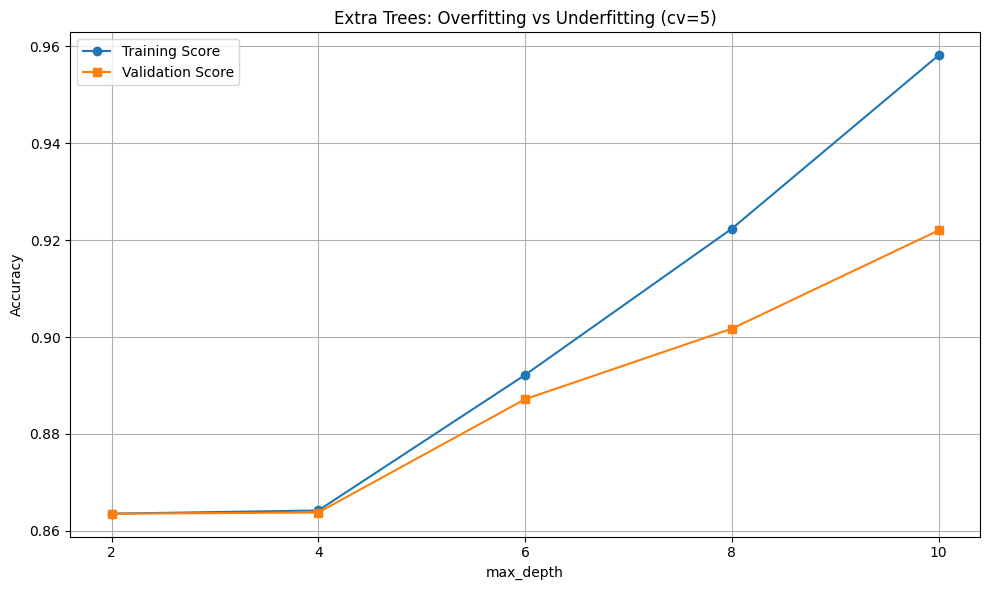

c:\Users\youssef desoky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\youssef desoky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\youssef desoky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\youssef desoky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The

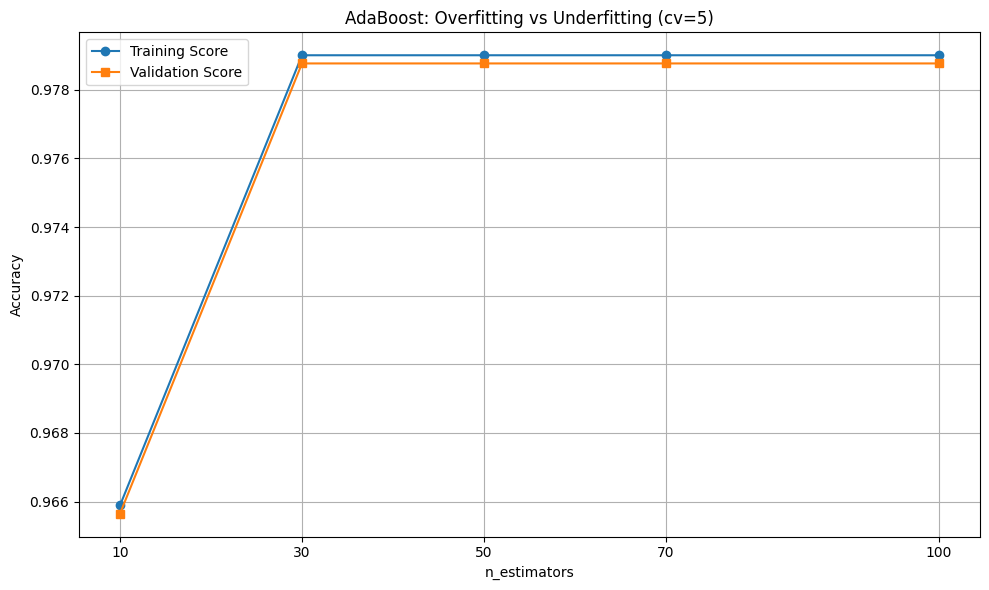

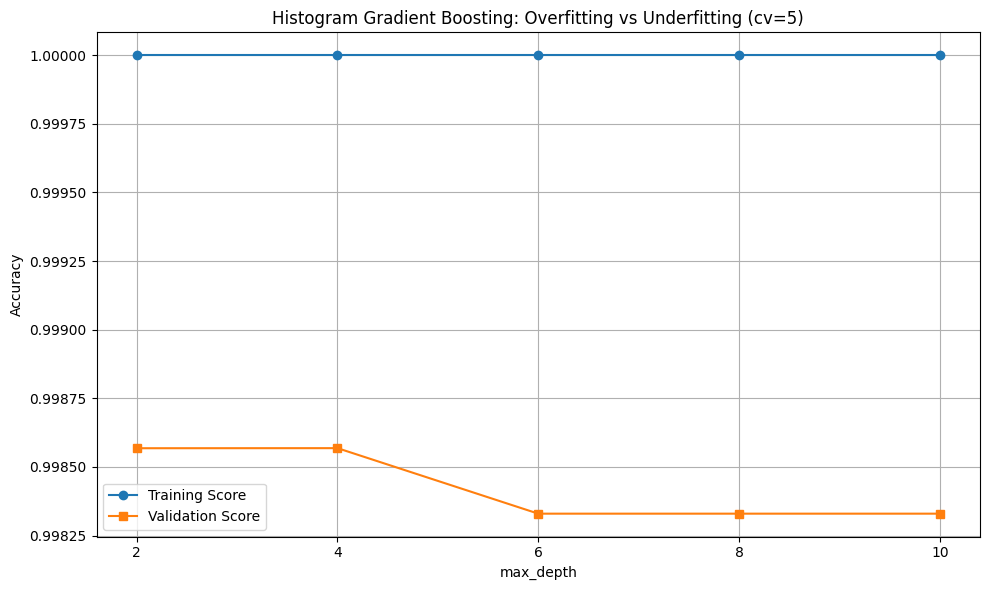

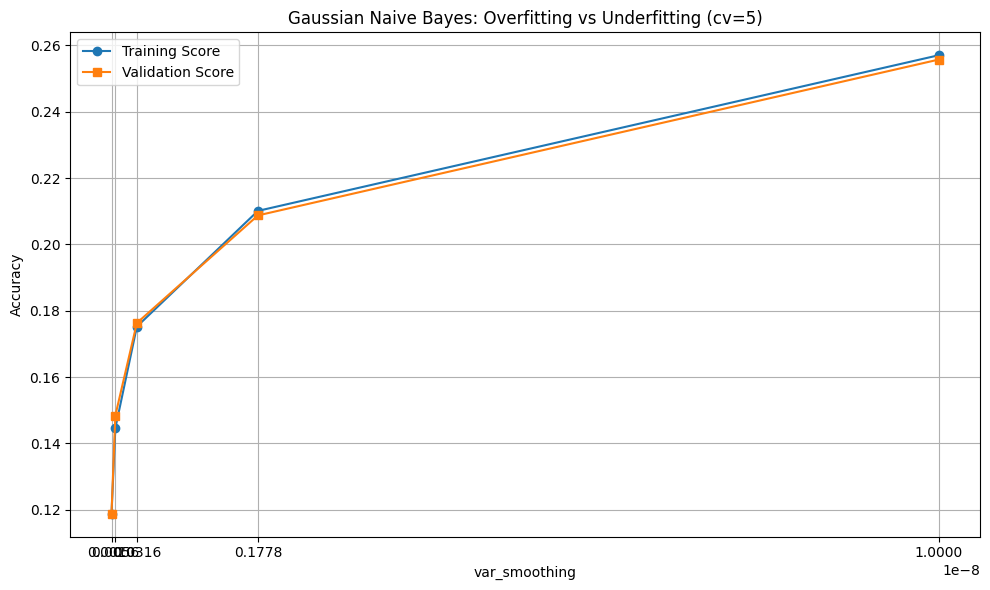

In [48]:
# Load your data
df = pd.read_csv("train_set.csv")
X = df.drop("triage", axis=1)
y = df["triage"]

# Train/test split
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify column types
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# Transform once
X_train_transformed = preprocessor.fit_transform(X_train)
y_train = y_train.values

# Initialize models dictionary
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), "max_depth", [2, 4, 6, 8, 10]),
    "SVM": (SVC(random_state=42), "C", np.logspace(-2, 2, 5)),
    "Linear SVM": (LinearSVC(random_state=42), "C", np.logspace(-2, 2, 5)),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), "max_depth", [2, 4, 6, 8, 10]),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), "max_depth", [2, 4, 6, 8, 10]),
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), "C", np.logspace(-2, 2, 5)),
    "Extra Trees": (ExtraTreesClassifier(random_state=42), "max_depth", [2, 4, 6, 8, 10]),
    "AdaBoost": (AdaBoostClassifier(random_state=42), "n_estimators", [10, 30, 50, 70, 100]),
    "Histogram Gradient Boosting": (HistGradientBoostingClassifier(random_state=42), "max_depth", [2, 4, 6, 8, 10]),
    "Gaussian Naive Bayes": (GaussianNB(), "var_smoothing", np.logspace(-11, -8, 5))
}

# Plot each model
for model_name, (model, param_name, param_range) in models.items():
    train_scores, val_scores = validation_curve(
        model, X_train_transformed, y_train,
        param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy"
    )
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score", marker='o')
    plt.plot(param_range, np.mean(val_scores, axis=1), label="Validation Score", marker='s')
    plt.title(f"{model_name}: Overfitting vs Underfitting (cv=5)")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    if param_name == "C":
        plt.xscale("log")
    plt.xticks(param_range)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()